# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


ROC-AUC Scores: [0.64525282 0.65329452 0.63651534 0.66267809 0.64304789]
Mean ROC-AUC: 0.6481577326040604
Cross-validated ROC-AUC: 0.648
Precision: 0.442
Recall: 0.057
F1 Score: 0.100
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     42522
           1       0.44      0.06      0.10      7478

    accuracy                           0.85     50000
   macro avg       0.65      0.52      0.51     50000
weighted avg       0.79      0.85      0.79     50000

Confusion Matrix:
 [[41989   533]
 [ 7055   423]]


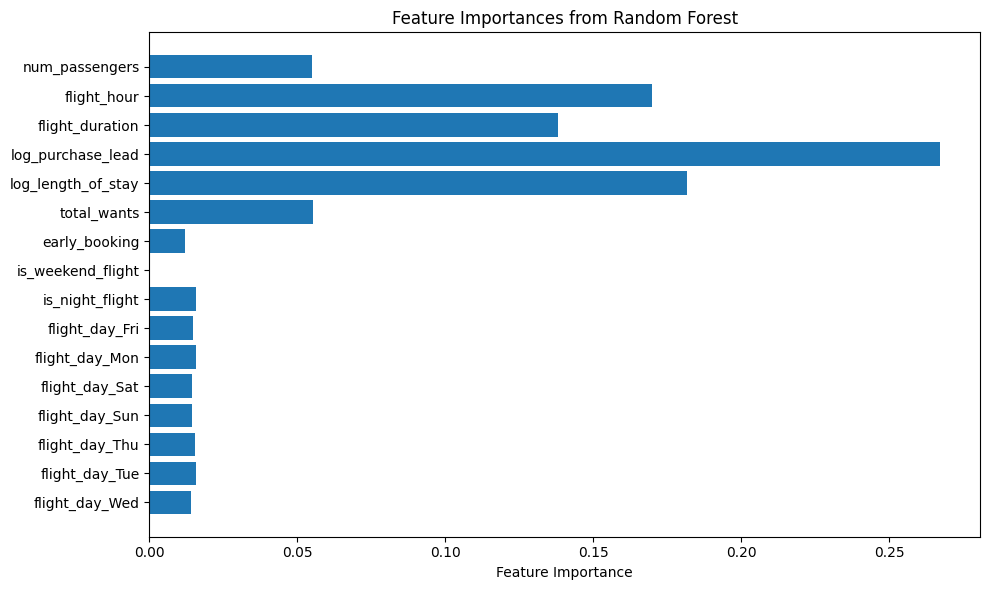

Template not found at 'PowerPoint_Template.pptx', creating a blank presentation.
PowerPoint summary saved to: flight_booking_model_summary.pptx


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import os

# Try to import python-pptx; install if missing
try:
    from pptx import Presentation
    from pptx.util import Pt
except ImportError:
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "python-pptx"])
    from pptx import Presentation
    from pptx.util import Pt

# Load your data
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# Feature engineering
df["total_wants"] = df["wants_extra_baggage"] + df["wants_preferred_seat"] + df["wants_in_flight_meals"]
df["log_purchase_lead"] = np.log1p(df["purchase_lead"])
df["log_length_of_stay"] = np.log1p(df["length_of_stay"])
df["early_booking"] = (df["purchase_lead"] > 30).astype(int)
df["is_weekend_flight"] = df["flight_day"].isin([6, 7]).astype(int)
df["is_night_flight"] = ((df["flight_hour"] >= 20) | (df["flight_hour"] < 6)).astype(int)

# Define features and target
target = "booking_complete"
features = [
    "num_passengers", "flight_hour", "flight_day", "flight_duration",
    "log_purchase_lead", "log_length_of_stay",
    "total_wants", "early_booking", "is_weekend_flight", "is_night_flight"
]
X = df[features]
y = df[target]

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()  # likely empty here

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="drop"
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Cross-validation and metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
print("ROC-AUC Scores:", roc_auc_scores)
print("Mean ROC-AUC:", np.mean(roc_auc_scores))

y_pred_class = cross_val_predict(model, X, y, cv=cv)
y_pred_proba = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]

precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred_class, average="binary")
roc_auc = roc_auc_score(y, y_pred_proba)

print(f"Cross-validated ROC-AUC: {roc_auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

print("Classification Report:\n", classification_report(y, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_class))

# Train final model on full data
model.fit(X, y)

# Extract feature names after preprocessing
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(columns)
        elif transformer == 'passthrough':
            names = columns
        else:
            names = columns
        feature_names.extend(names)
    return feature_names

feature_names = get_feature_names(model.named_steps['preprocessor'])
importances = model.named_steps['classifier'].feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Create PowerPoint summary slide
template_path = "PowerPoint_Template.pptx"
if os.path.isfile(template_path):
    prs = Presentation(template_path)
else:
    print(f"Template not found at '{template_path}', creating a blank presentation.")
    prs = Presentation()

# Use slide layout 1 (Title + Content) or fallback to first layout
try:
    slide_layout = prs.slide_layouts[1]
except IndexError:
    slide_layout = prs.slide_layouts[0]

slide = prs.slides.add_slide(slide_layout)

# Set slide title
slide.shapes.title.text = "Flight Booking Model Summary"

# Add summary bullets
content_placeholder = slide.shapes.placeholders[1]
text_frame = content_placeholder.text_frame
text_frame.clear()

summary_points = [
    "Model: Random Forest Classifier with balanced class weights",
    f"Cross-validated ROC-AUC: {roc_auc:.3f}",
    f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}",
    "Top features impacting booking completion:",
]

import numpy as np
top_n = 5
indices = np.argsort(importances)[::-1][:top_n]
for i in indices:
    feat = feature_names[i]
    imp = importances[i]
    summary_points.append(f"- {feat}: importance {imp:.3f}")

for point in summary_points:
    p = text_frame.add_paragraph()
    p.text = point
    p.level = 0
    p.font.size = Pt(14)

output_path = "flight_booking_model_summary.pptx"
prs.save(output_path)
print(f"PowerPoint summary saved to: {output_path}")


In [ ]:
!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [python-pptx] [python-pptx]


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.